In [1]:
import pandas as pd

df = pd.read_csv("heart-patients-in-pakistan.csv")

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Shape of dataset: (368, 60)

First 5 rows:
   Age Age.Group  Gender Locality   Marital status                         \
0   45     41-50  Female      RURAL                               MARRIED   
1   51     51-60  Female      URBAN                               MARRIED   
2   55     51-60  Female      RURAL                               MARRIED   
3   55     51-60  Female      RURAL                               MARRIED   
4   56     51-60  Female      RURAL                               MARRIED   

  Life.Style                                                                                \
0                                                 NO                                         
1                                                 NO                                         
2                                                YES                                         
3                                                YES                                         
4                       

In [ ]:
# Clean column names and remove unnecessary spaces

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display cleaned column names
print("Cleaned Column Names:\n", df.columns.tolist())

# Check for duplicate columns
print("\nAny duplicated columns? ->", df.columns.duplicated().any())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Cleaned Column Names:
 ['Age', 'Age.Group', 'Gender', 'Locality', 'Marital status', 'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium', 'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK', 'SK.React', 'Reaction', 'Mortality', 'Follow.Up']

Any duplicated columns? -> False

Number of duplicate rows: 214


In [3]:
# Drop Redundant / Irrelevant Columns
if 'Family.History' in df.columns and 'F.History' in df.columns:
    df = df.drop(columns=['Family.History'])
    print("\nDropped redundant column: 'Family.History'")

# columns renamed for consistency
rename_map = {
    'Marital status': 'Marital_Status',
    'Life.Style': 'Lifestyle',
    'Locality': 'Locality',
    'Others': 'Others_Info',
    'SK.React': 'Skin_Reaction'
}

df.rename(columns=rename_map, inplace=True)
print("\nRenamed columns for clarity.")




Dropped redundant column: 'Family.History'

Renamed columns for clarity.


In [4]:
# categorical values standardization (fixing mainly the capitalization and spacing issues)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()

if 'Smoking' in df.columns:
    df['Smoking'] = df['Smoking'].astype(str).str.strip().str.capitalize()

if 'HTN' in df.columns:
    df['HTN'] = df['HTN'].astype(str).str.strip().str.capitalize()

print("\nStandardized categorical values (Gender, Smoking, HTN).")


Standardized categorical values (Gender, Smoking, HTN).


In [6]:
# Removing the duplicates 
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"\Removed {before - after} duplicate rows.")

# checking and fixing the numeric columns 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    invalid = df[df[col] < 0].shape[0]
    if invalid > 0:
        print(f"Found {invalid} invalid (negative) values in {col}. Replacing with NaN.")
        df.loc[df[col] < 0, col] = pd.NA

print("\Checked and fixed invalid numeric values (if any).")

\Removed 0 duplicate rows.
\Checked and fixed invalid numeric values (if any).


<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\C'
C:\Users\kazmi\AppData\Local\Temp\ipykernel_8912\2578125982.py:6: SyntaxWarning: invalid escape sequence '\R'
  print(f"\Removed {before - after} duplicate rows.")
C:\Users\kazmi\AppData\Local\Temp\ipykernel_8912\2578125982.py:16: SyntaxWarning: invalid escape sequence '\C'
  print("\Checked and fixed invalid numeric values (if any).")


In [7]:
print("\Final dataset info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDataset is now clean and ready for EDA!")

\Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 153
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               154 non-null    int64  
 1   Age.Group         154 non-null    object 
 2   Gender            154 non-null    object 
 3   Locality          154 non-null    object 
 4   Marital_Status    154 non-null    object 
 5   Lifestyle         154 non-null    object 
 6   Sleep             154 non-null    object 
 7   Category          154 non-null    object 
 8   Depression        154 non-null    object 
 9   Hyperlipi         154 non-null    object 
 10  Smoking           154 non-null    object 
 11  F.History         154 non-null    int64  
 12  Diabetes          154 non-null    int64  
 13  HTN               154 non-null    object 
 14  Allergies         154 non-null    object 
 15  BP                154 non-null    float64
 16  Thrombolysis      154 non-nu

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\kazmi\AppData\Local\Temp\ipykernel_8912\1161896931.py:1: SyntaxWarning: invalid escape sequence '\F'
  print("\Final dataset info:")


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 5)


In [9]:
selected_cols = [
    'Age', 'Gender', 'Smoking', 'Diabetes', 'HTN', 
    'Depression', 'BP', 'chol', 'thalach', 'oldpeak', 'num', 'Mortality'
]

eda_df = df[selected_cols].copy()

# Confirm selection
eda_df.head()


,Age,Gender,Smoking,Diabetes,HTN,Depression,BP,chol,thalach,oldpeak,num,Mortality
0,45,Female,No,1,No,YES,100.6,341,136,3.0,2,0
1,51,Female,No,0,No,YES,90.6,305,142,1.2,2,0
2,55,Female,No,1,Yes,YES,100.7,327,117,3.4,2,0
3,55,Female,No,1,Yes,YES,160.1,205,130,2.0,3,0
4,56,Female,No,1,Yes,YES,90.6,288,133,4.0,3,0


In [10]:
# Convert numeric-like columns stored as object
for col in eda_df.columns:
    if eda_df[col].dtype == 'object':
        try:
            eda_df[col] = pd.to_numeric(eda_df[col])
        except:
            pass

# Check datatypes after conversion
print(eda_df.dtypes)

# categorize age groups
eda_df['Age_Group'] = pd.cut(eda_df['Age'], bins=[0, 30, 45, 60, 75, 100], 
                             labels=['<30', '30-45', '45-60', '60-75', '75+'])


Age             int64
Gender         object
Smoking        object
Diabetes        int64
HTN            object
Depression     object
BP            float64
chol            int64
thalach         int64
oldpeak       float64
num             int64
Mortality       int64
dtype: object


In [11]:
# feature engineering 
# created a new risk score column
eda_df['Risk_Score'] = (
    (eda_df['BP'] > 140).astype(int) +
    (eda_df['chol'] > 200).astype(int) +
    (eda_df['Diabetes'] == 1).astype(int) +
    (eda_df['Smoking'] == 1).astype(int)
)

# Categorize risk
eda_df['Risk_Category'] = pd.cut(eda_df['Risk_Score'],
                                 bins=[-1,1,3,5],
                                 labels=['Low', 'Moderate', 'High'])


In [13]:
eda_df.to_csv("heart_patients_cleaned_ready.csv", index=False)
print("Cleaned dataset saved as 'heart_patients_cleaned_ready.csv'")



Cleaned dataset saved as 'heart_patients_cleaned_ready.csv'


C:\Users\kazmi\AppData\Local\Temp\ipykernel_8912\1463543358.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender", loc="upper right")


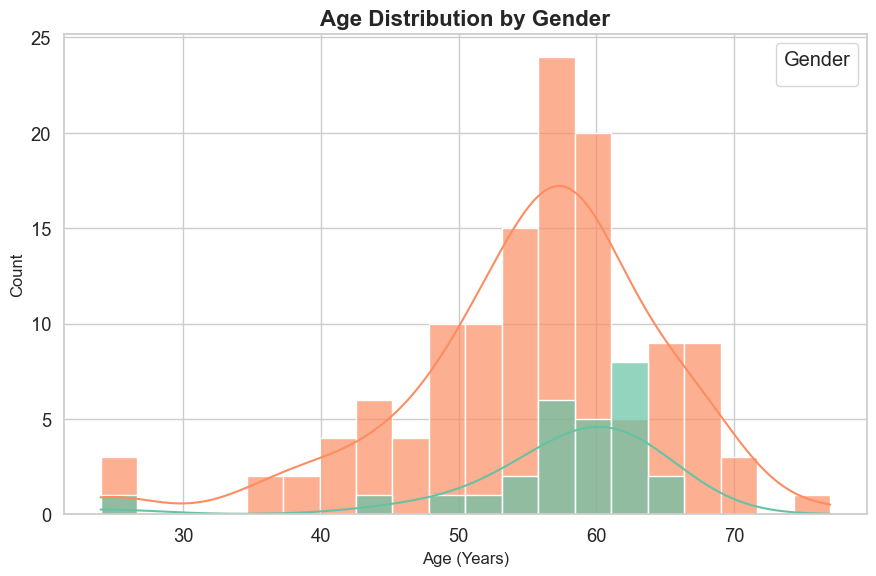

In [20]:
# Age Distribution by Gender


sns.set(style="whitegrid", palette="Set2", font_scale=1.2)
plt.figure(figsize=(9,6))

# histogram
sns.histplot(data=eda_df, x='Age', hue='Gender', kde=True, bins=20, alpha=0.7)

# titles and labels
plt.title("Age Distribution by Gender", fontsize=16, weight='bold')
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender", loc="upper right")
plt.tight_layout()
plt.show()

C:\Users\kazmi\AppData\Local\Temp\ipykernel_8912\14910093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eda_df, x='Gender', y='chol', palette="coolwarm")


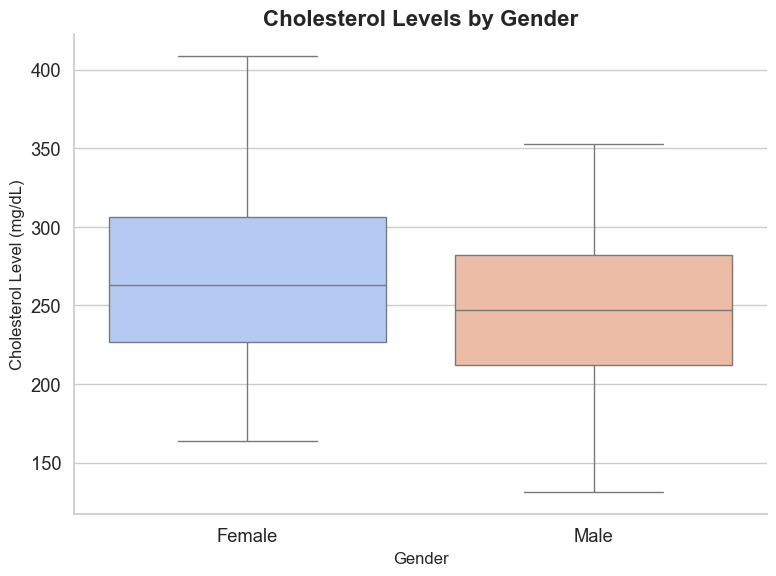

In [21]:
# Cholestrol levels by gender
plt.figure(figsize=(8,6))
sns.boxplot(data=eda_df, x='Gender', y='chol', palette="coolwarm")

plt.title("Cholesterol Levels by Gender", fontsize=16, weight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Cholesterol Level (mg/dL)", fontsize=12)

# for subtle gridlines looks good i guess
sns.despine()
plt.tight_layout()
plt.show()


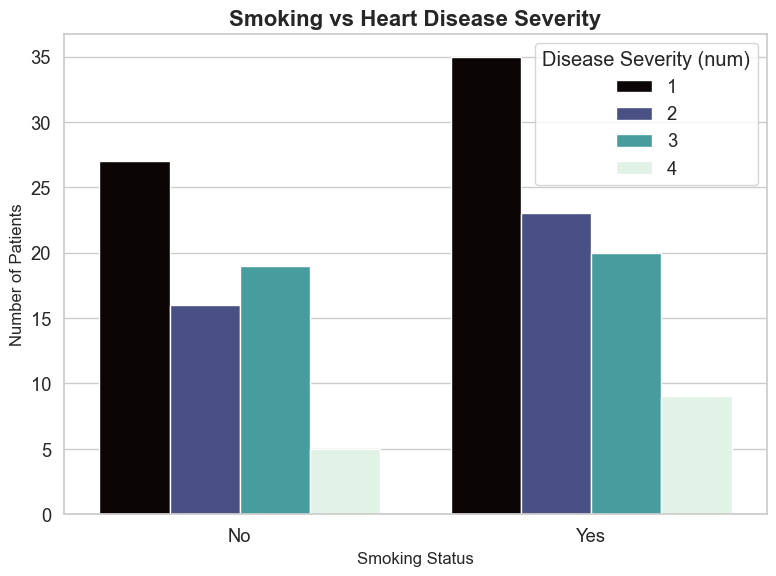

In [22]:
# Smoking vs heart disease severity
plt.figure(figsize=(8,6))
sns.countplot(data=eda_df, x='Smoking', hue='num', palette="mako")

plt.title("Smoking vs Heart Disease Severity", fontsize=16, weight='bold')
plt.xlabel("Smoking Status", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.legend(title="Disease Severity (num)")
plt.tight_layout()
plt.show()


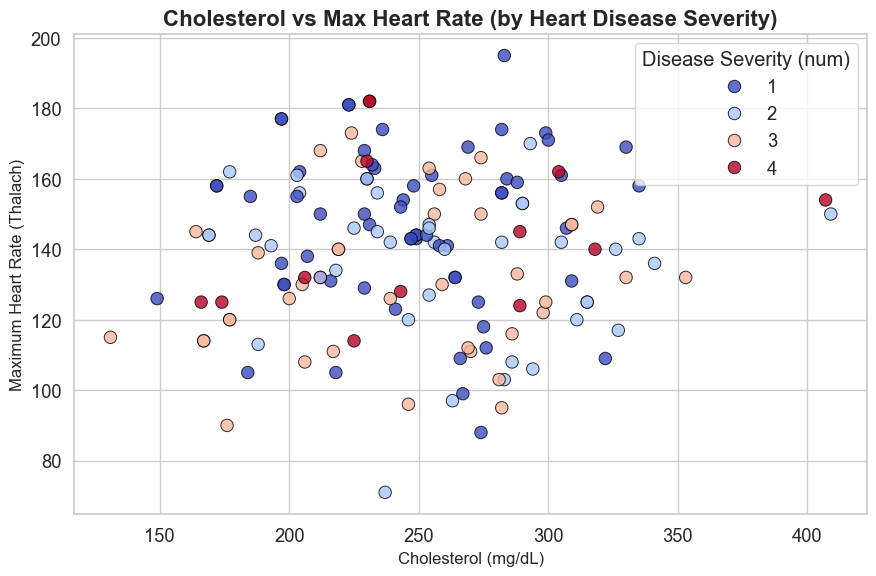

In [23]:
# Patients with higher cholesterol and lower heart rate values often have more severe disease — visualized by the color intensity.
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=eda_df,
    x='chol',
    y='thalach',
    hue='num',
    palette='coolwarm',
    s=80,
    alpha=0.8,
    edgecolor='black'
)

plt.title("Cholesterol vs Max Heart Rate (by Heart Disease Severity)", fontsize=16, weight='bold')
plt.xlabel("Cholesterol (mg/dL)", fontsize=12)
plt.ylabel("Maximum Heart Rate (Thalach)", fontsize=12)
plt.legend(title="Disease Severity (num)")
plt.tight_layout()
plt.show()


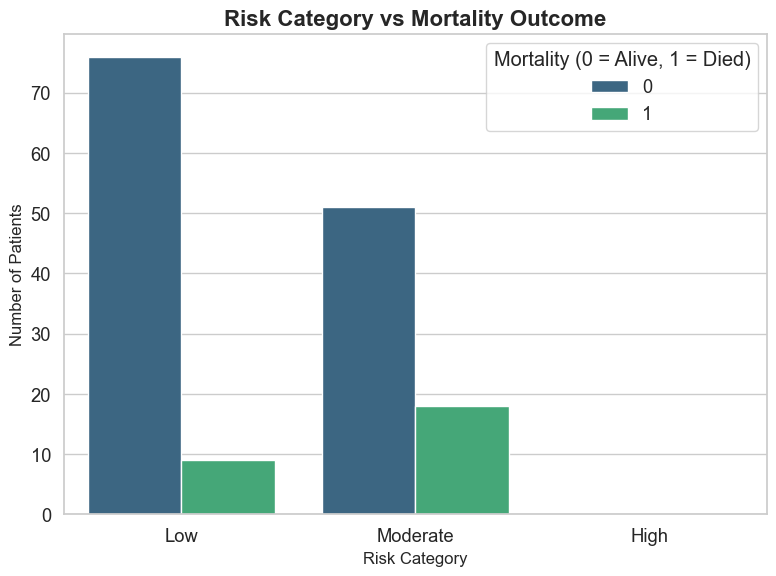

In [24]:
# Risk Category vs Mortality Outcome
plt.figure(figsize=(8,6))
sns.countplot(data=eda_df, x='Risk_Category', hue='Mortality', palette="viridis")

plt.title("Risk Category vs Mortality Outcome", fontsize=16, weight='bold')
plt.xlabel("Risk Category", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.legend(title="Mortality (0 = Alive, 1 = Died)")
plt.tight_layout()
plt.show()

In [25]:
# just seeing if these tweaks affect the graphs
sns.set_theme(style="whitegrid", font="DejaVu Sans", palette="husl", font_scale=1.2)
plt.rcParams.update({
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "legend.fontsize": 10,
    "figure.figsize": (9, 6)
})


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:

eda_df = pd.read_csv("heart_patients_cleaned_ready.csv")

print("✅ Cleaned dataset loaded successfully!")
print("Shape:", eda_df.shape)
print(eda_df.head())


✅ Cleaned dataset loaded successfully!
Shape: (154, 15)
   Age  Gender Smoking  Diabetes  HTN Depression     BP  chol  thalach  \
0   45  Female      No         1   No        YES  100.6   341      136   
1   51  Female      No         0   No        YES   90.6   305      142   
2   55  Female      No         1  Yes        YES  100.7   327      117   
3   55  Female      No         1  Yes        YES  160.1   205      130   
4   56  Female      No         1  Yes        YES   90.6   288      133   

   oldpeak  num  Mortality Age_Group  Risk_Score Risk_Category  
0      3.0    2          0     30-45           2      Moderate  
1      1.2    2          0     45-60           1           Low  
2      3.4    2          0     45-60           2      Moderate  
3      2.0    3          0     45-60           3      Moderate  
4      4.0    3          0     45-60           2      Moderate  


In [6]:
print(eda_df.columns.tolist())


['Age', 'Gender', 'Smoking', 'Diabetes', 'HTN', 'Depression', 'BP', 'chol', 'thalach', 'oldpeak', 'num', 'Mortality', 'Age_Group', 'Risk_Score', 'Risk_Category']


c:\Users\kazmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\kazmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\kazmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\kazmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\kazmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

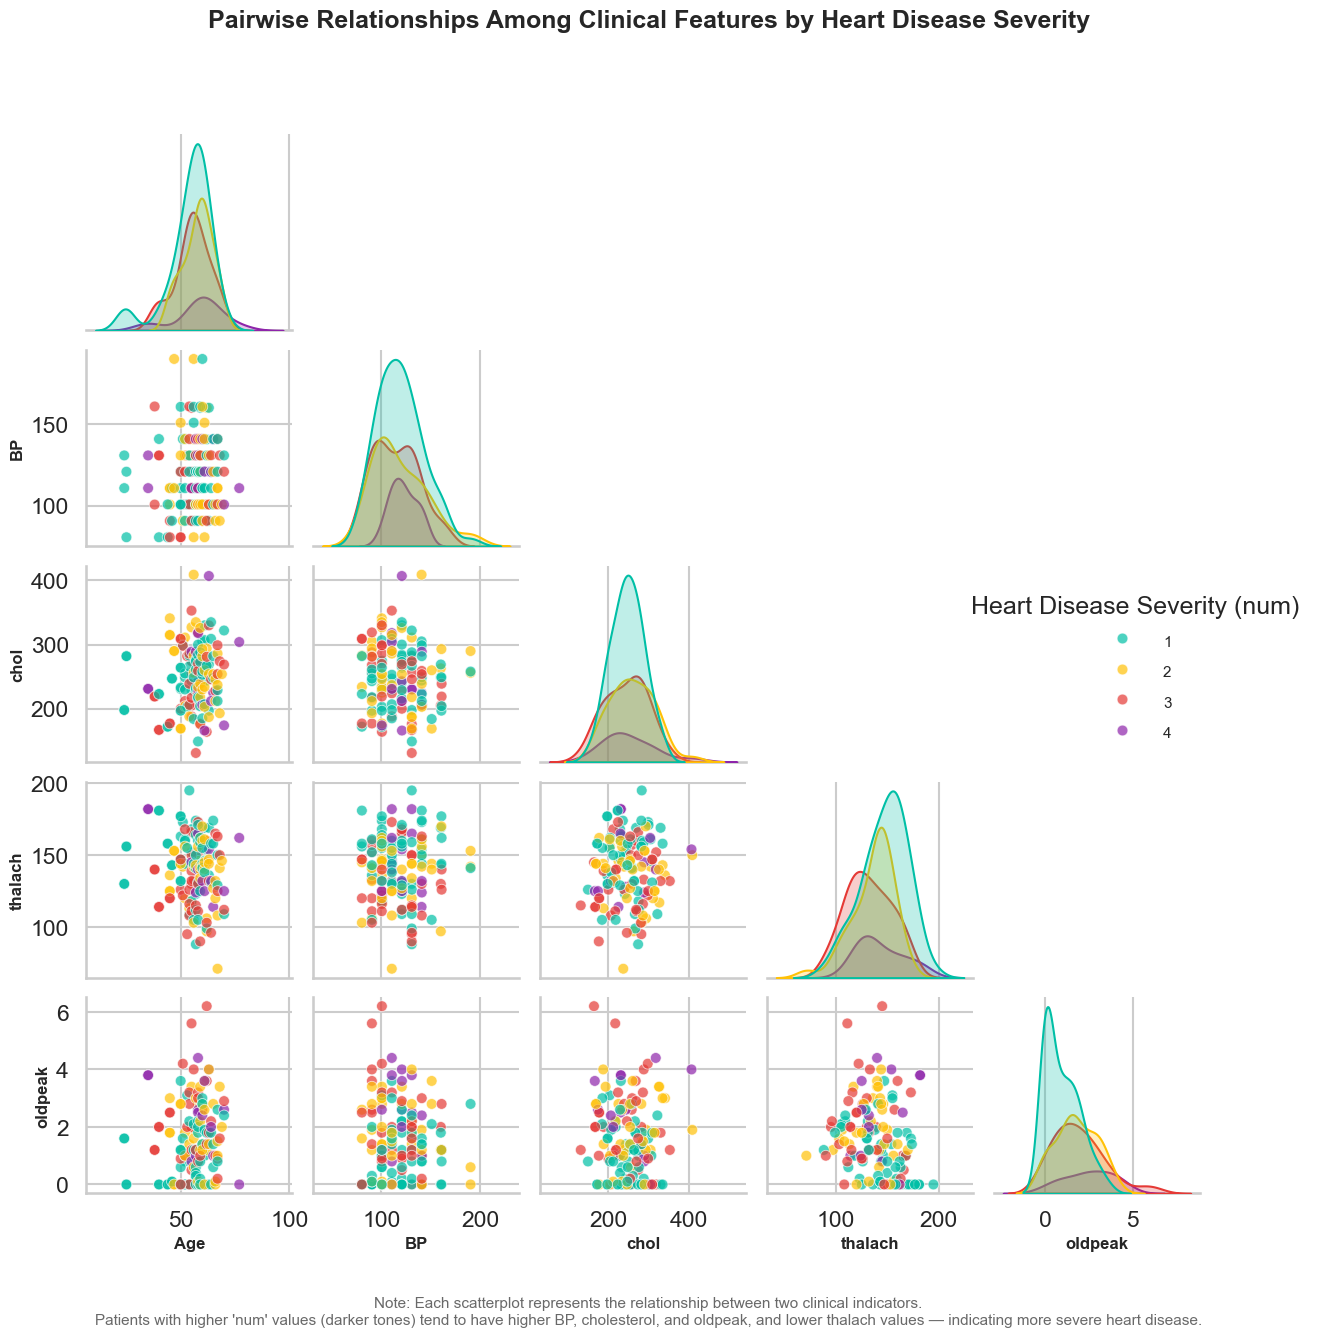

In [17]:


# Set global theme
sns.set_theme(style="whitegrid", context="talk")

# Define improved color palette for better contrast
custom_palette = sns.color_palette(["#00BFA6", "#FFC107", "#E53935", "#8E24AA", "#3949AB"])

# Create pairplot with style improvements
pair = sns.pairplot(
    data=eda_df,
    vars=['Age', 'BP', 'chol', 'thalach', 'oldpeak'],
    hue='num',
    palette=custom_palette,
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'white', 'linewidth': 0.6}
)

# Adjust global titles and layout
pair.fig.suptitle("Pairwise Relationships Among Clinical Features by Heart Disease Severity", 
                  fontsize=18, fontweight='bold', y=1.02)
pair.fig.subplots_adjust(top=0.92, wspace=0.1, hspace=0.1)

# Add axis labels manually for better visibility
for i, var in enumerate(['Age', 'BP', 'chol', 'thalach', 'oldpeak']):
    pair.axes[i, 0].set_ylabel(var, fontsize=12, fontweight='bold')
    pair.axes[-1, i].set_xlabel(var, fontsize=12, fontweight='bold')

# Adjust legend
pair._legend.set_title("Heart Disease Severity (num)")
for t in pair._legend.texts:
    t.set_fontsize(11)
pair._legend.get_frame().set_edgecolor('gray')
pair._legend.get_frame().set_alpha(0.8)

# Annotate interpretive note inside the figure (bottom-right)
plt.figtext(
    0.5, -0.03,
    "Note: Each scatterplot represents the relationship between two clinical indicators.\n"
    "Patients with higher 'num' values (darker tones) tend to have higher BP, cholesterol, and oldpeak, "
    "and lower thalach values — indicating more severe heart disease.",
    wrap=True, horizontalalignment='center', fontsize=11, color='dimgray'
)

plt.show()


C:\Users\kazmi\AppData\Local\Temp\ipykernel_22288\1038858341.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_profile = eda_df.groupby('Risk_Category')[features].mean()
posx and posy should be finite values
posx and posy should be finite values


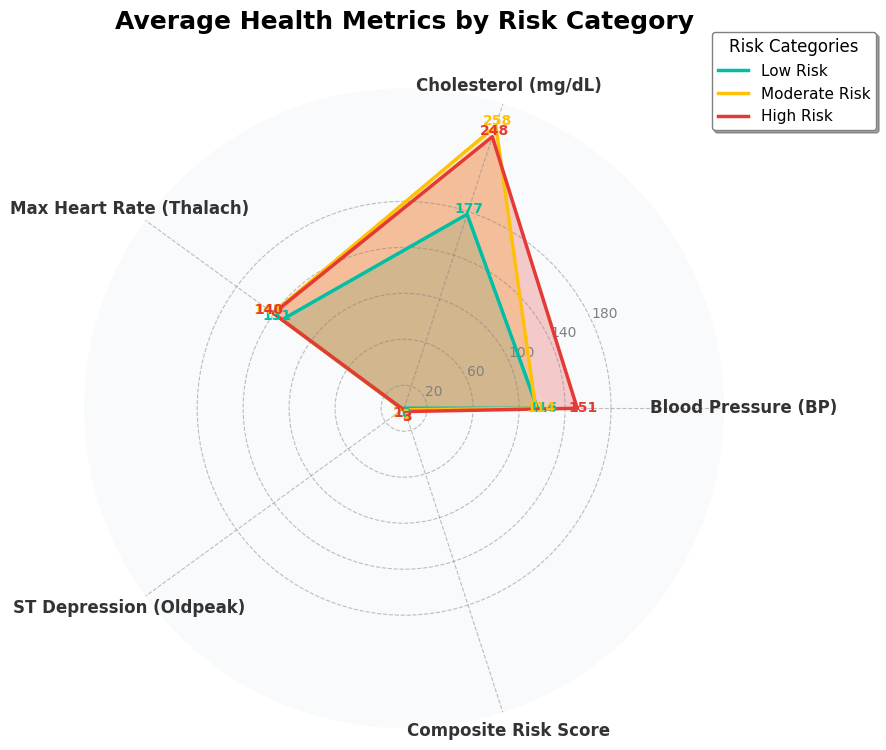

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Data Preparation

features = ['BP', 'chol', 'thalach', 'oldpeak', 'Risk_Score']

# Compute mean values per risk category
risk_profile = eda_df.groupby('Risk_Category')[features].mean()

# Ensure order of categories
risk_order = ['Low', 'Moderate', 'High']
risk_profile = risk_profile.reindex(risk_order)

# Setup angles for radar axes
categories = list(risk_profile.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close loop


# Chart Setup

plt.figure(figsize=(9, 9), facecolor='white')
ax = plt.subplot(111, polar=True)

# Title
plt.title("Average Health Metrics by Risk Category", fontsize=18, fontweight='bold', y=1.08)

# Color theme
colors = {
    'Low': '#00BFA6',       # Teal
    'Moderate': '#FFC107',  # Amber
    'High': '#E53935'       # Red
}

# Set background and grid style
ax.set_facecolor("#F9FAFB")
ax.grid(color="gray", linestyle="--", linewidth=0.8, alpha=0.5)
ax.spines['polar'].set_visible(False)

# Plot Each Risk Category
 
for category, color in colors.items():
    if category in risk_profile.index:
        values = risk_profile.loc[category].tolist()
        values += values[:1]
        ax.plot(angles, values, color=color, linewidth=2.5, label=f"{category} Risk")
        ax.fill(angles, values, color=color, alpha=0.25)

        # Add data value annotations on each vertex
        for i, v in enumerate(values[:-1]):
            angle_rad = angles[i]
            x = angle_rad
            y = v + 5
            ax.text(x, y, f"{v:.0f}", color=color, fontsize=10, ha='center', va='center', fontweight='bold')


# Axis Customization

# Set feature labels (axis labels)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(
    ['Blood Pressure (BP)', 'Cholesterol (mg/dL)', 'Max Heart Rate (Thalach)', 'ST Depression (Oldpeak)', 'Composite Risk Score'],
    fontsize=12, fontweight='bold', color='#333333'
)

# Radial axis (r-axis)
ax.set_rlabel_position(25)
plt.yticks(
    [20, 60, 100, 140, 180],
    ["20", "60", "100", "140", "180"],
    color="gray",
    size=10
)
plt.ylim(0, max(risk_profile.max()) + 20)


# Legend & Annotation

legend = plt.legend(
    title="Risk Categories",
    loc='upper right',
    bbox_to_anchor=(1.25, 1.1),
    fontsize=11,
    title_fontsize=12,
    frameon=True,
    shadow=True,
    facecolor='white'
)
legend.get_frame().set_edgecolor('gray')

# Annotation for clarity
plt.annotate(
    "Higher values of BP, Cholesterol, and Oldpeak\nindicate increased cardiovascular strain.",
    xy=(0, 0), xytext=(-2.2, -180),
    textcoords='data',
    fontsize=11,
    color='dimgray',
    ha='left',
    va='center'
)

plt.tight_layout()
plt.show()


In [ ]:
# editing it here again since high showed 0 values so making it a bit more leniant
eda_df['Risk_Category'] = pd.cut(
    eda_df['Risk_Score'],
    bins=[-1, 0, 2, 4],
    labels=['Low', 'Moderate', 'High']
)


In [15]:
eda_df['Risk_Category'].value_counts()


Risk_Category
Moderate    124
Low          15
High         15
Name: count, dtype: int64

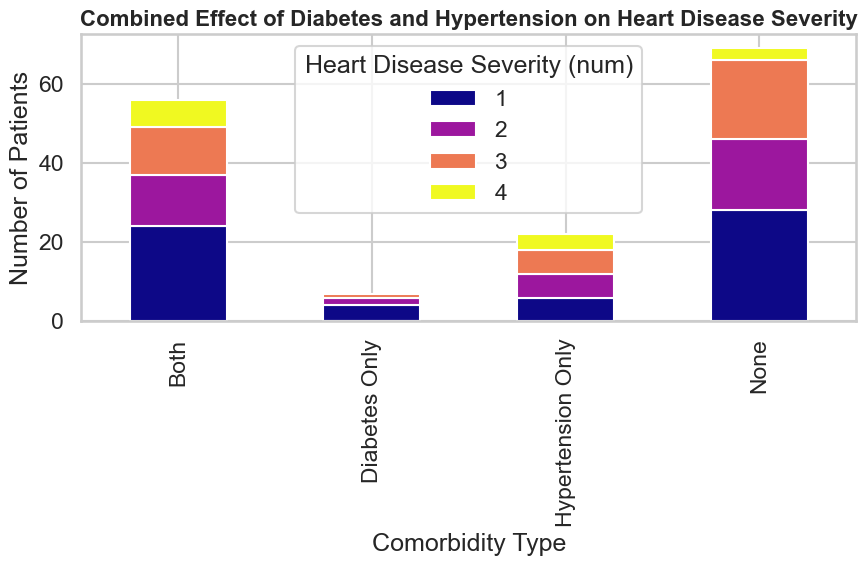

In [18]:
# Create a combination feature
eda_df['Comorbidity'] = eda_df.apply(
    lambda x: 'Both' if (x['Diabetes'] == 1 and x['HTN'] == 'Yes') 
              else 'Diabetes Only' if x['Diabetes'] == 1 
              else 'Hypertension Only' if x['HTN'] == 'Yes' 
              else 'None', axis=1
)

# Group and pivot data
combo_counts = eda_df.groupby(['Comorbidity', 'num']).size().reset_index(name='Count')
combo_pivot = combo_counts.pivot(index='Comorbidity', columns='num', values='Count').fillna(0)

# Plot stacked bar chart
combo_pivot.plot(kind='bar', stacked=True, colormap='plasma', figsize=(9,6))
plt.title("Combined Effect of Diabetes and Hypertension on Heart Disease Severity", fontsize=16, weight='bold')
plt.xlabel("Comorbidity Type")
plt.ylabel("Number of Patients")
plt.legend(title="Heart Disease Severity (num)")
plt.tight_layout()
plt.show()
